# Imports

Dieses Notebook enth√§lt unterschiedliche Feature selection Teile.

In [10]:
import pandas as pd
import numpy as np
#data visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

pd.options.display.precision = 10

# CatBoost

## CatBoost _ 46 Features

In [26]:
feature_importances = m.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

skew: 6.956353024194814
mean: 6.310241034648395
zero_crossings: 5.623567322885117
min: 5.131646774109507
max: 4.675742164711834
rms_kurt: 4.568926431731883
spec_cent_75%q: 4.247758642230181
spec_cent_max: 4.190178784627712
kurt: 4.0064199945053645
absMax: 3.9460600174417597
rms_skew: 3.85348703664952
spec_cent_min: 3.6934909243271754
spec_cent_99%q: 3.2906090443130447
spec_cent_95%q: 3.127583383114546
spec_cent_kurt: 2.881897914136412
rms_std: 2.8585371426252313
spec_cent_skew: 2.7592601102982806
spec_cent_1%q: 2.3981813233520315
absMean: 2.2081091681679137
spec_cent_25%q: 2.1917590233766946
spec_cent_5%q: 2.187149344091493
spec_cent_std: 2.088807628580568
spec_cent_mean: 1.7825498327962848
rms_25%q: 1.6886142654225265
rms_5%q: 1.6533318151592
rms_min: 1.349751043103175
rms_1%q: 1.2869792383771024
rms_75%q: 1.162142790714365
std: 1.1610925545115878
absStd: 1.1431570565375115
rms_95%q: 1.0517503333680798
rms_mean: 0.986889097389073
rms_max: 0.8021959148026183
rms_99%q: 0.744350617275997

### Feature Importances CatBoost 92 Features


In [170]:
feature_importances = m.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

skew: 3.7327485058842353
zero_crossings: 2.6910612666765195
chroma_stft_95%q: 2.492919097851608
chroma_stft_max: 2.433370716668
spec_bw_max: 2.309247317085658
chroma_stft_75%q: 2.2380370796342484
mfcc_kurt: 2.212971303619402
chroma_stft_99%q: 2.2002330843379094
mfcc_skew: 2.167079335930965
rms_kurt: 2.1335816699215036
min: 2.0465433937015933
chroma_stft_25%q: 2.0404246925114564
spec_cent_max: 2.024123956689253
spec_bw_99%q: 1.9896295759118838
rms_skew: 1.9504872156983881
kurt: 1.9240578966757738
max: 1.8776868053134221
chroma_stft_mean: 1.7746410969446156
chroma_stft_skew: 1.7474203251129428
spec_cent_75%q: 1.7346653567125268
absMax: 1.7147830785704512
spec_bw_95%q: 1.6481040240890352
spec_cent_95%q: 1.632193162272066
chroma_stft_kurt: 1.6308604302491063
chroma_stft_cent_5%q: 1.6195931150780902
mfcc_min: 1.5905301411387578
mfcc_max: 1.5582226588007155
spec_bw_75%q: 1.5080148235854145
rolloff_min: 1.4766048108376157
chroma_stft_1%q: 1.410350911652337
rms_std: 1.3869328563784704
spec_cen

## GradientBoost

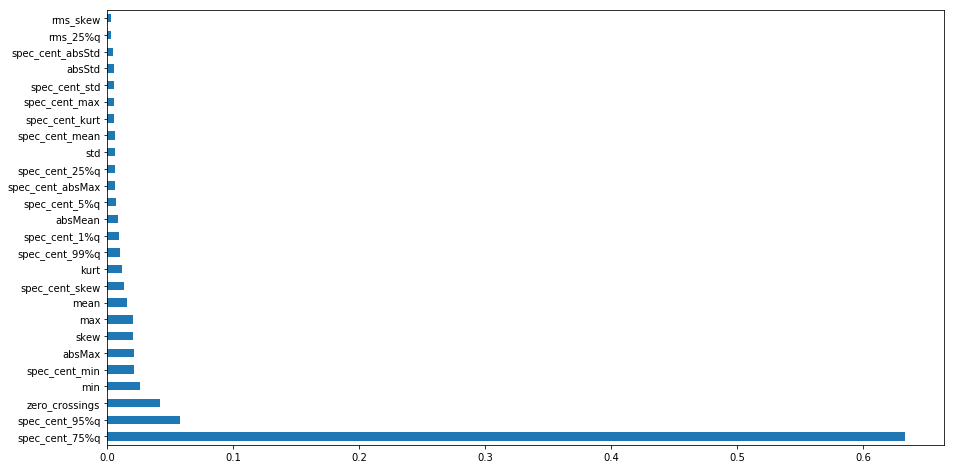

In [36]:
(pd.Series(grid.best_estimator_.named_steps['regressor'].feature_importances_, index=X_train.columns)
   .nlargest(26)
   .plot(kind='barh',figsize=(15, 8))) 
#quelle: https://stackoverflow.com/questions/44511636/matplotlib-plot-feature-importance-with-feature-names

https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py

# PCA dimensionality reduction

## Umgebungsvariablen

In [3]:
#feature generated 24.03.2019
earthquake_daten = '''C:/Users/taacodo4/GITRepos/CAS_PML_Earthquake_pred/data/'''
#earthquake_daten = '''C:/studium/studium/CAS_PML/Projekt_Arbeit/earthquake/Daten/earthquake_data/'''
feature_62900_94 = 'Features_62900-94.csv'
feature_41934_94 = 'Features_41934_94.csv'
Features_4194_94 = 'Features_4194_94.csv'

## Feature laden

In [7]:
train_data = pd.read_csv(earthquake_daten+feature_41934_94)
feature_data = train_data.iloc[:,1:95]
time_to_failure = np.array(train_data.iloc[:,-1])

## PCA decomposition

In [8]:
X = feature_data
pca = PCA(n_components=20)
pca.fit(X)
PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)

[8.52705821e-01 9.58549116e-02 2.90582650e-02 9.29929939e-03
 5.78655377e-03 2.00423455e-03 1.52929293e-03 8.43931036e-04
 7.96014617e-04 4.85758394e-04 3.72315766e-04 3.24307000e-04
 2.88007907e-04 1.48272860e-04 1.09891221e-04 1.03972262e-04
 8.34802766e-05 4.54612670e-05 3.44998236e-05 2.85704366e-05]
[79515260.49877508 26659871.85554378 14678636.38702668  8303782.92063546
  6550295.13973427  3855006.76575254  3367411.66985017  2501522.14200958
  2429469.17690809  1897846.26346181  1661523.87267225  1550704.45129802
  1461346.076807    1048532.03629571   902676.9897155    878030.53246248
   786760.97839939   580592.79207787   505777.27191378   460266.4407739 ]


In [14]:
ipca = IncrementalPCA(n_components=20, batch_size=30)
ipca.fit(X)
IncrementalPCA(batch_size=30, copy=True, n_components=20, whiten=False)
features_PCA=ipca.transform(X) 

## Store dimension reduced data set

In [20]:
features_PCA=pd.DataFrame(features_PCA)

In [22]:
features_PCA.to_csv(earthquake_daten+'feature_PCA_20.csv')

In [24]:
features_PCA.describe()

0                  1                  2   \
count  4.1934000000e+04   41934.0000000000   41934.0000000000   
mean  -1.4505303571e-09       0.0000000012      -0.0000000008   
std    3.8830458536e+05  130190.7385024594   71681.6090411365   
min   -1.2992836629e+06 -468907.9315866884 -269487.0275734656   
25%   -2.9089691527e+05  -81466.0043087734  -49772.0891744057   
50%   -3.8009611505e+04    2482.3307358331   -7481.9862822919   
75%    2.7125695466e+05   83976.5013626959   43116.1665607062   
max    1.1827074360e+06  815800.4558949496  399723.5762686584   

                      3                 4                  5   \
count   41934.0000000000  4.1934000000e+04   41934.0000000000   
mean        0.0000000009 -7.5289348213e-11       0.0000000008   
std     40550.6686848547  3.1987691699e+04   18825.5284933114   
min   -286505.8817654646 -2.8452499582e+05 -245942.5645875377   
25%    -22399.7179241424 -1.5906446344e+04  -10808.0602636159   
50%       777.1437270787  3.9217000354e+03    -239.7072183458   
75%     22393.7401682705  2.0997192697e+04   10569.6176446914   
max    467740.3024461291  8.0017359459e+04  107687.8576784896   

                      6                 7                 8   \
count   41934.0000000000  41934.0000000000  41934.0000000000   
mean        0.0000000002      0.0000000012      0.0000000007   
std     16444.4080479186  12215.9257326756  11864.0625039865   
min    -93125.7331924281 -55692.2654418333 -48231.1813381875   
25%    -10588.6469918144  -7709.4769884867  -7575.4639231596   
50%      -713.0172965389    -12.0129575481    554.4428993032   
75%      9504.2011512804   7698.9959268221   7897.5610046531   
max    130800.5894526803  93058.1155653276  88273.4037773978   

                      9                 10                 11  \
count   41934.0000000000  41934.0000000000   41934.0000000000   
mean       -0.0000000015     -0.0000000013      -0.0000000003   
std      9267.9362874452   8113.8798858732    7572.7051196544   
min   -121175.4870243307 -33694.8087111159  -54272.4816415194   
25%     -5761.2047853640  -5530.8356942549   -4546.7039498809   
50%      -358.7294796692   -117.6674586595     -91.1140877998   
75%      5325.7608163393   5273.8529977273    4384.3881800774   
max     76618.7040339263  54151.7639614645  147012.8532744334   

                     12                13                14                15  \
count  41934.0000000000  41934.0000000000  41934.0000000000  4.1934000000e+04   
mean       0.0000000002      0.0000000014      0.0000000010  8.6160774747e-11   
std     7136.3327356924   5120.3974201408   4408.1228561905  4.2876788880e+03   
min   -63345.5378137706 -33263.6760653770 -41193.7661766041 -3.4539237651e+04   
25%    -4255.6309314894  -3149.0122144194  -2600.1210657344 -2.7725106069e+03   
50%      131.3108257613   -108.3640705350    223.8196592396  3.0725852131e+01   
75%     4353.4326602425   2978.8657518729   2821.8457437552  2.8287918510e+03   
max    49400.0672310408  76013.7112075892  52456.3545511974  2.3631474186e+04   

                     16                17                18                19  
count  41934.0000000000  41934.0000000000  41934.0000000000  41934.0000000000  
mean      -0.0000000006      0.0000000010     -0.0000000005      0.0000000025  
std     3842.0014014641   2834.4219349246   2469.7925474318   2228.6784942144  
min   -73395.0203287465 -24225.1098565710 -16893.9636961896 -21306.8131445452  
25%    -2330.2268112657  -1788.1941399532  -1623.6713584333  -1488.9793470226  
50%       -5.4430149573     64.4326057169      6.1243985432   -108.2806660729  
75%     2265.0774370199   1829.0102502347   1585.1388493960   1387.3015219230  
max    26364.9545067922  25484.9085559814  17050.5737431884  12283.1853897518